In [4]:
import cv2
import matplotlib.pyplot as plt
import os
from glob import glob
import numpy as np
from tqdm import tqdm

In [108]:
sample1 = cv2.imread("./data/ytdataset/images_nopad/training/100_Paul Rice “Waltz for Ella” FREE SHEET MUSIC P Barton FEURICH piano.mp4/0500.png")
sample1 = cv2.cvtColor(sample1, cv2.COLOR_BGR2RGB)
sample2 = cv2.imread("./data/MIDItest/images/testing/500_10.mp4/0500.png")
sample2 = cv2.cvtColor(sample2, cv2.COLOR_BGR2RGB)
sample3 = cv2.imread("./data/bommelpiano/images/training/600_The Bonnie Banks o Loch Lomond - Piano Arrangement.mp4/0500.png")
sample3 = cv2.cvtColor(sample3, cv2.COLOR_BGR2RGB)

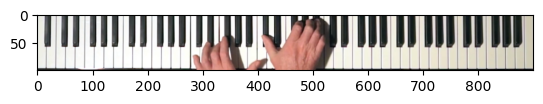

In [109]:
plt.imshow(sample1)

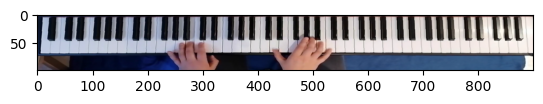

In [110]:
plt.imshow(sample2, cmap="gray")

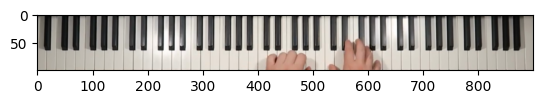

In [111]:
plt.imshow(sample3, cmap="gray")

---------------

In [12]:
label_files = sorted(glob("./data/ytdataset/labels_audeo/training/*"))
label_files_2 = sorted(glob("./data/bommelpiano/labels/training/*"))
label_files_test1 = sorted(glob("./data/ytdataset/labels_audeo/testing/*"))
label_files_test2 = sorted(glob("./data/MIDItest/labels/testing/*"))
label_files_test3 = sorted(glob("./data/bommelpiano/labels/testing/*"))

ds_names = ["yt_train", "bommel_train", "yt_test", "midi_test", "bommel_test"]

In [13]:
check_file_list = [
    label_files, 
    label_files_2, 
    label_files_test1, 
    label_files_test2, 
    label_files_test3]

In [14]:
def make_onset(roll: np.array):
    onset = np.zeros(roll.shape)
    for j in range(roll.shape[0]):
        if j != 0:
            onset[j][np.setdiff1d(roll[j].nonzero(),roll[j - 1].nonzero())] = 1
        else:
            onset[j][roll[j].nonzero()] = 1
    return onset

In [15]:
onset_sum_list = []
for filelist in check_file_list:
    onset_sum = []
    for label in tqdm(filelist):
        label_dict = np.load(label, allow_pickle=True)
        label_np = np.array(list(label_dict.values()))
        label_np = (label_np > 0).astype(int)

        onset_np = make_onset(label_np)

        onset_sum.append(np.sum(onset_np, axis=0))
    onset_sum = np.stack(onset_sum)
    onset_sum_list.append(onset_sum)

100% 182/182 [01:22<00:00,  2.21it/s]
100% 30/30 [00:06<00:00,  4.67it/s]
100% 19/19 [00:07<00:00,  2.45it/s]
100% 8/8 [00:01<00:00,  7.13it/s]
100% 9/9 [00:01<00:00,  4.61it/s]


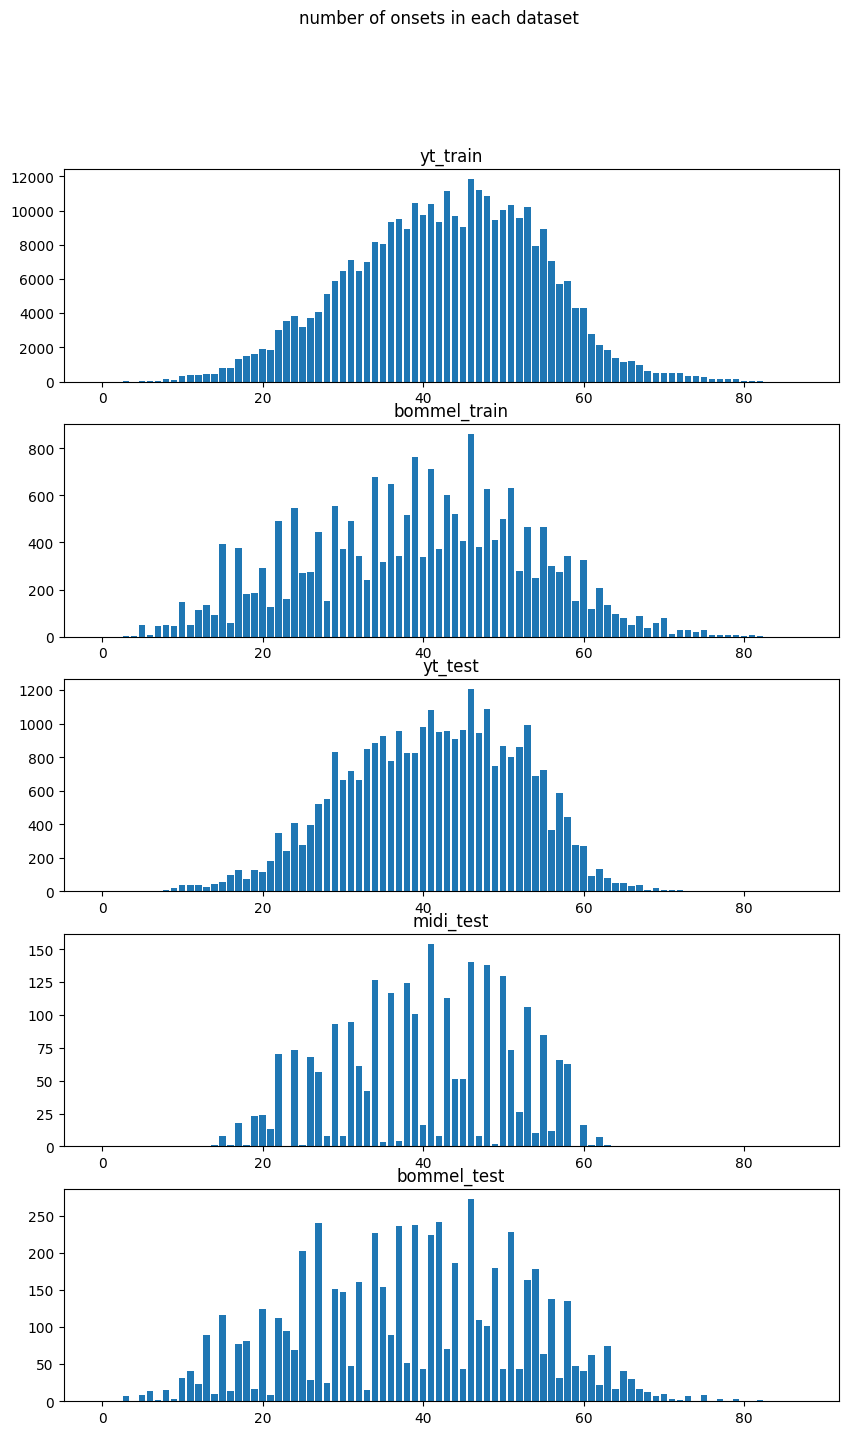

In [64]:
plt.figure(figsize=(10, 16))
plt.suptitle("number of onsets in each dataset")
for i, onset_sum in enumerate(onset_sum_list):
    plt.subplot(5, 1, i+1)
    plt.title(ds_names[i])
    plt.bar(range(88), np.sum(onset_sum, axis=0))

----------

### Sampling one frame from videos

In [5]:
data_path = "./data/MIDItest/miditest_videos"
target_path_base = "./comp_images"
images_list = os.listdir(data_path)

In [6]:
sorted(images_list)

['500_10.mp4',
 '501_21.mp4',
 '502_23.mp4',
 '503_24.mp4',
 '504_25.mp4',
 '505_26.mp4',
 '506_27.mp4',
 '507_5.mp4']

In [9]:
for image_path_base in images_list:
    # image_path_base = sorted(images_list)[12]
    image_path = os.path.join(data_path, image_path_base)
    target_path = os.path.join(target_path_base, image_path_base)
    print(image_path)
    i=0
    cap = cv2.VideoCapture(image_path)
    while True:
        retval, frame = cap.read()
        if not(retval):	# 프레임정보를 정상적으로 읽지 못하면
            break  # while문을 빠져나가기
        i+=1
        # 키 입력을 받으면 키값을 key로 저장 -> esc == 27(아스키코드)
        if i == 1000:
            cv2.imwrite(f'{target_path_base}/{image_path_base}.png', frame)
            break	# while문을 빠져나가기

./data/MIDItest/miditest_videos/506_27.mp4
./data/MIDItest/miditest_videos/501_21.mp4
./data/MIDItest/miditest_videos/503_24.mp4
./data/MIDItest/miditest_videos/500_10.mp4
./data/MIDItest/miditest_videos/504_25.mp4
./data/MIDItest/miditest_videos/507_5.mp4
./data/MIDItest/miditest_videos/502_23.mp4
./data/MIDItest/miditest_videos/505_26.mp4


----------

### analog crop

In [1]:
from keyboard_det.crop_preprocess import crop_piano

In [2]:
from glob import glob
import cv2
import matplotlib.pyplot as plt

In [27]:
img_list = sorted(glob("./comp_images3/*"))

In [28]:
img_iter = iter(img_list)

166, 307


In [ ]:
plt.figure(figsize=(20, 15))


# img = next(img_iter)
img = img_list[12]

print(img)
img = cv2.imread(img)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)
points = crop_piano(img)
print("minY: {1}, maxY: {3}, minX: {0}, maxX: {2}".format(*points))
plt.imshow(img)
plt.scatter([points[0], points[0], points[2], points[2]], [points[1], points[3], points[1], points[3]], color="red")
plt.plot([points[0], points[2]], [points[1], points[1]], color="red")
plt.plot([points[0], points[2]], [points[3], points[3]], color="red")

maxYoffset 879


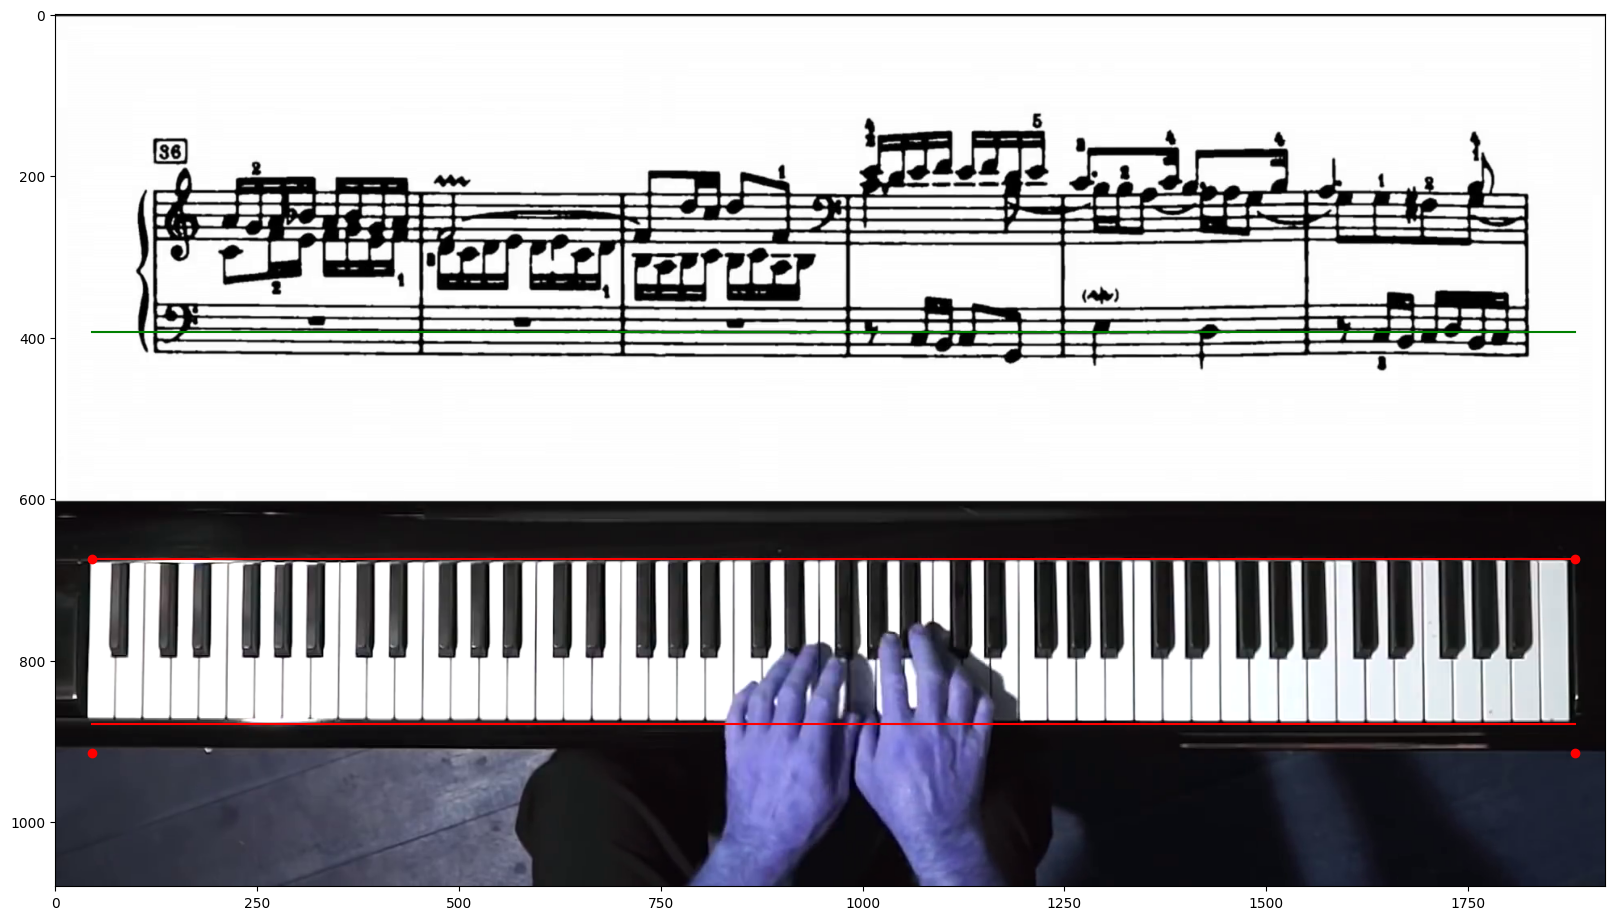

In [41]:
offset = 36
print(f"maxYoffset {points[3]-offset}")
testminY = 393
plt.figure(figsize=(20, 15))
plt.imshow(img)
plt.scatter([points[0], points[0], points[2], points[2]], [points[1], points[3], points[1], points[3]], color="red")
plt.plot([points[0], points[2]], [points[1], points[1]], color="red")
plt.plot([points[0], points[2]], [testminY, testminY], color="green")
plt.plot([points[0], points[2]], [points[3]-offset, points[3]-offset], color="red")

-------

### image samples

In [93]:
image_paths = glob("./data/bommelpiano/images/training/*")

In [94]:
for i, image_path in enumerate(image_paths):
    target_load_path = os.path.join(image_path, f'2000.png')
    target_save_path = os.path.join("./test_out", f'{i}_2000.png')
    os.system(f"cp '{target_load_path}' '{target_save_path}'")

cp: cannot stat './data/bommelpiano/images/training/615_Pride & Prejudice Main Theme - Piano Arrangement.mp4/2000.png': No such file or directory
cp: cannot stat './data/bommelpiano/images/training/608_Mission Impossible Theme - Piano Arrangement.mp4/2000.png': No such file or directory
